# STOCHASTIC GRADIENT DESCENT

1. We have a point x, we wanna do GD, but we wont compute J(θ) at x

2. Instead,  we take a random set of n points out there within our dataset, and we compute the gradient of the loss function J(θ) at each of their positions.

3. With them gradient positions, we use them and insert the position x into each one of them n gradient vectors to obtain the respective gradients.

4. Once each respective gradient is computed, we take an average of them(Vanilla SGD uses just 1 data point though) and use that new fuzzy resultant gradient for the current GD step.

5. Redo 1. until convergence/satisfaction is attained.

In [17]:
# Importing Necessary Library
import numpy as np

# Linear regression problem
X = np.array([0, 1, 2, 3, 4, 5]) 
Y = np.array([0, 1.1, 1.9, 3, 4.2, 5.2])  




In [18]:
# Model initialization
m = np.random.randn()  # Initialize the slope (random number)
b = np.random.randn()  # Initialize the intercept (random number)

learning_rate = 0.01  # Define the learning rate
epochs = 10000  # Define the number of iterations

# SGD implementation
for _ in range(epochs):
    random_index = np.random.randint(len(X))  # select a random sample
    x = X[random_index]
    y = Y[random_index]
    pred = m * x + b  # Calculate the predicted y
    # Calculate gradients for m (slope) and b (intercept)
    grad_m = (pred - y) * x 
    grad_b = (pred - y)
    m -= learning_rate * grad_m  # Update m using the calculated gradient
    b -= learning_rate * grad_b  # Update b using the calculated gradient

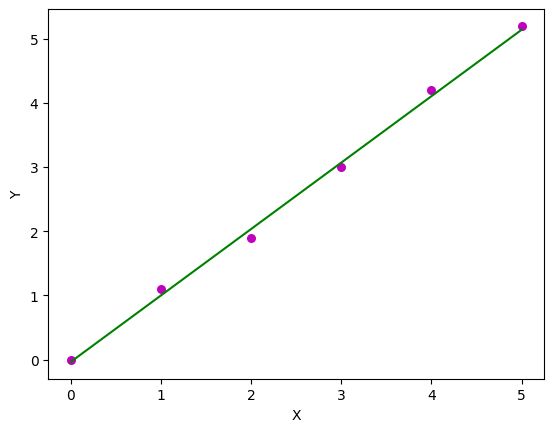

In [19]:
import matplotlib.pyplot as plt

# Plot the data points
plt.scatter(X, Y, color = "m", marker = "o", s = 30)

# Predicted line for the model
y_pred = m * X + b

# Plotting the predicted line
plt.plot(X, y_pred, color = "g")

# Adding labels to the plot
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

### Jax variant

Below is an idential variant of this SGD implementation but leveraging the jax library instead

In [20]:
import jax
import jax.numpy as jnp 

X = jnp.array([0, 1, 2, 3, 4, 5]) 
Y = jnp.array([0, 1.1, 1.9, 3, 4.2, 5.2]) 


def prediction(m, b, x):
    return m * x + b

def mse(m, c, x, y):
    estimate = prediction(m, c, x)
    return jnp.mean((estimate - y) ** 2)

@jax.jit
def SGD_step(m, b, x, y, learningRate):

    pred = prediction(m, b, x)

    grad_m = (pred - y) * x
    grad_b = (pred - y)

    m -= learningRate * grad_m
    b -= learningRate * grad_b

    return m, b


def train_SGD(X, Y, epochs, learningRate, seed):

    X = jnp.asarray(X)
    Y = jnp.asarray(Y)

    m = jnp.array(0.0)
    b = jnp.array(0.0)

    key = jax.random.PRNGKey(seed)

    n = X.shape[0]

    for _ in range(epochs):
        key, subkey = jax.random.split(key)

        random_index = jax.random.randint(subkey, (), 0, n)

        
        x = X[random_index]
        y = Y[random_index]

        m, b = SGD_step(m, b, x, y, learningRate)

    return m, b
        


In [23]:
key = jax.random.PRNGKey(42)
X = jax.random.normal(key, (10000,))
Y = 3.0 * X + 2.0 + 0.1 * jax.random.normal(key, X.shape)

m, b = train_SGD(X, Y, epochs=10000, learningRate=0.01, seed=1)
print("Learned:", float(m), float(b))


Learned: 3.09999942779541 1.9999995231628418
